In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_neighbor_labels = [y_train[i] for i in k_neighbors_indices]
    most_common_label = np.bincount(k_neighbor_labels).argmax()
    return most_common_label

def k_nn_classifier(X_train, y_train, X_test, k):
    predictions = [predict(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)
k_value = 2
y_pred = k_nn_classifier(X_train, y_train, X_test, k_value)


y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [6]:
print(classification_report(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



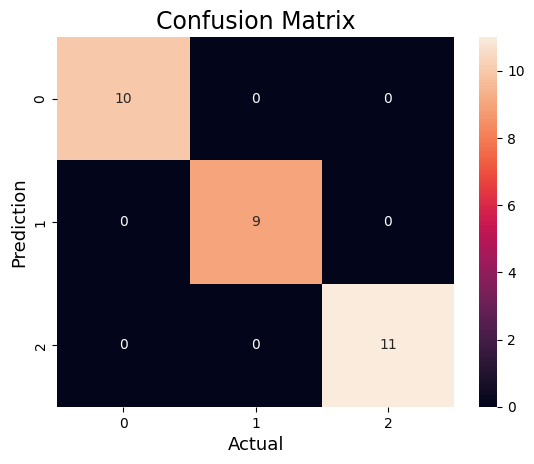

In [7]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

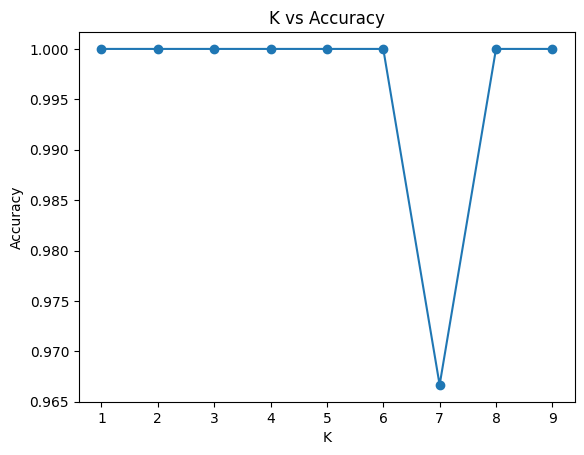

In [15]:
k_values = range(1, 10)
accuracy_values = []
for k in k_values:
    y_pred = k_nn_classifier(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()
